<img src="../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px\" align="left">

## Purity Randomized Benchmarking


- Last Updated: June 24, 2019
- Requires: qiskit-terra 0.8, qiskit-ignis 0.1.1, qiskit-aer 0.2

## Introduction

**Purity Randomized Benchmarking** is a variant of the Randomized Benchmarking (RB) method, which quantifies how *coherent* the errors are. The protocol executes the RB sequneces containing of Clifford gates, and then calculates the *purity* $Tr(\rho^2)$, and fits the purity result to an exponentially decaying curve.

This notebook gives an example for how to use the ``ignis.verification.randomized_benchmarking`` module in order to perform purity RB.

In [1]:
#Import general libraries (needed for functions)
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

import qiskit.ignis.verification.randomized_benchmarking as rb

#Import Qiskit classes classes
import qiskit
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, coherent_unitary_error

## Select the Parameters of the Purity RB Run

First, wee need to choose the regular RB parameters:

- **nseeds**: The number of seeds. For each seed there you will get a separate list of output circuits.
- **length_vector**: The length vector of Clifford lengths. Must be in ascending order. RB sequences of increasing length grow on top of the previous sequences.
- **rb_pattern**: A list of the form [[i],[j],[k],...] or [[i,j],[k,l],...], etc. which will make simultaneous RB sequences. All the patterns should have the same dimetion, namely only 1-qubit sequences Qk or only 2-qubit sequences Qi,Qj, etc. The number of qubits is the sum of the entries.
- **length_multiplier = None**: No length_multiplier for purity RB.
- **seed_offset**: What to start the seeds at (e.g. if we want to add more seeds later).
- **align_cliffs**: If true adds a barrier across all qubits in rb_pattern after each set of cliffords.

As well as another parameter for purity RB:

- **is_purity = True**

In this example we have 4 qubits Q0,Q1,Q2,Q3. We are running 2Q RB (on qubits Q0,Q1 and on qubits Q2,Q3) simultaneously. 

In [2]:
# Example of 2-qubits Purity RB
#Number of qubits
nQ = 4
#Number of seeds (random sequences)
nseeds = 3
#Number of Cliffords in the sequence (start, stop, steps)
nCliffs = np.arange(1,200,20)
#2Q RB on Q0,Q2 and 1Q RB on Q1
rb_pattern = [[0,1],[2,3]]

## Generate Purity RB sequences

We generate purity RB sequences. We start with a small example (so it doesn't take too long to run).

In order to generate the purity RB sequences **rb_purity_circs**, which is a list of lists of lists of quantum circuits, we run the function rb.randomized_benchmarking_seq.

This function returns:

- **rb_purity_circs**: A list of lists of lists of circuits for the purity rb sequences (separate list for each of the $3^n$ options and for each seed).
- **xdata**: The Clifford lengths (with multiplier if applicable).
- **rb_opts_dict**: Option dictionary back out with default options appended.

As well as:

- **npurity**: the number of purity rb circuits (per seed) which equals to $3^n$, where $n$ is the dimension, e.g npurity=3 for 1-qubit RB, npurity=9 for 2-qubit RB.

In order to generate each of the $3^n$ circuits, we need to do (per each of the $n$ qubits) either:
- nothing (Pauli-$Z$), or
- $\pi/2$-rotation around $x$ (Pauli-$X$), or
- $\pi/2$-rotation around $y$ (Pauli-$Y$),

and then measure the result.

In [3]:
rb_opts = {}
rb_opts['length_vector'] = nCliffs
rb_opts['nseeds'] = nseeds
rb_opts['rb_pattern'] = rb_pattern
rb_opts['is_purity'] = True
rb_purity_circs, xdata, npurity = rb.randomized_benchmarking_seq(**rb_opts)
print (npurity)

9


To illustrate, we print the circuit names for purity RB.

In [4]:
for i in range(len(rb_purity_circs)):
    for j in range(len(rb_purity_circs[i])):
        for k in range(len(rb_purity_circs[i][j])):
            print (rb_purity_circs[i][j][k].name)

rb_purity_ZZ_length_0_seed_0
rb_purity_ZZ_length_1_seed_0
rb_purity_ZZ_length_2_seed_0
rb_purity_ZZ_length_3_seed_0
rb_purity_ZZ_length_4_seed_0
rb_purity_ZZ_length_5_seed_0
rb_purity_ZZ_length_6_seed_0
rb_purity_ZZ_length_7_seed_0
rb_purity_ZZ_length_8_seed_0
rb_purity_ZZ_length_9_seed_0
rb_purity_XZ_length_0_seed_0
rb_purity_XZ_length_1_seed_0
rb_purity_XZ_length_2_seed_0
rb_purity_XZ_length_3_seed_0
rb_purity_XZ_length_4_seed_0
rb_purity_XZ_length_5_seed_0
rb_purity_XZ_length_6_seed_0
rb_purity_XZ_length_7_seed_0
rb_purity_XZ_length_8_seed_0
rb_purity_XZ_length_9_seed_0
rb_purity_YZ_length_0_seed_0
rb_purity_YZ_length_1_seed_0
rb_purity_YZ_length_2_seed_0
rb_purity_YZ_length_3_seed_0
rb_purity_YZ_length_4_seed_0
rb_purity_YZ_length_5_seed_0
rb_purity_YZ_length_6_seed_0
rb_purity_YZ_length_7_seed_0
rb_purity_YZ_length_8_seed_0
rb_purity_YZ_length_9_seed_0
rb_purity_ZX_length_0_seed_0
rb_purity_ZX_length_1_seed_0
rb_purity_ZX_length_2_seed_0
rb_purity_ZX_length_3_seed_0
rb_purity_ZX_l

As an example, we print the circuit corresponding to the first RB sequences, for each of the $3^n$ parameters.

In [5]:
for i in range(npurity):
    print ("circ no. ", i)
    print (rb_purity_circs[0][i][0])

circ no.  0
         ┌─────┐┌───┐        ░    ┌───┐ ┌───┐   ┌─┐                         »
qr_0: |0>┤ Sdg ├┤ H ├────────░────┤ H ├─┤ S ├───┤M├─────────────────────────»
         └┬───┬┘├───┤┌───┐   ░   ┌┴───┴┐├───┤   └╥┘┌───┐┌─┐                 »
qr_1: |0>─┤ H ├─┤ H ├┤ S ├───░───┤ Sdg ├┤ H ├────╫─┤ H ├┤M├─────────────────»
          ├───┤ ├───┤└───┘ ┌───┐ └┬───┬┘├───┤ ░  ║ └───┘└╥┘┌───┐┌─────┐┌───┐»
qr_2: |0>─┤ H ├─┤ S ├──■───┤ H ├──┤ S ├─┤ X ├─░──╫───────╫─┤ X ├┤ Sdg ├┤ H ├»
          ├───┤ └───┘┌─┴─┐┌┴───┴┐ ├───┤ ├───┤ ░  ║       ║ ├───┤└┬───┬┘├───┤»
qr_3: |0>─┤ H ├──────┤ X ├┤ Sdg ├─┤ H ├─┤ Z ├─░──╫───────╫─┤ Z ├─┤ H ├─┤ S ├»
          └───┘      └───┘└─────┘ └───┘ └───┘ ░  ║       ║ └───┘ └───┘ └───┘»
 cr_0: 0 ════════════════════════════════════════╩═══════╬══════════════════»
                                                         ║                  »
 cr_1: 0 ════════════════════════════════════════════════╩══════════════════»
                                                    

         ┌─────┐┌───┐        ░    ┌───┐ ┌───┐   ┌─┐                      »
qr_0: |0>┤ Sdg ├┤ H ├────────░────┤ H ├─┤ S ├───┤M├──────────────────────»
         └┬───┬┘├───┤┌───┐   ░   ┌┴───┴┐├───┤   └╥┘┌───┐┌────────────┐┌─┐»
qr_1: |0>─┤ H ├─┤ H ├┤ S ├───░───┤ Sdg ├┤ H ├────╫─┤ H ├┤ Ry(1.5708) ├┤M├»
          ├───┤ ├───┤└───┘ ┌───┐ └┬───┬┘├───┤ ░  ║ └───┘└───┬───┬────┘└╥┘»
qr_2: |0>─┤ H ├─┤ S ├──■───┤ H ├──┤ S ├─┤ X ├─░──╫──────────┤ X ├──────╫─»
          ├───┤ └───┘┌─┴─┐┌┴───┴┐ ├───┤ ├───┤ ░  ║          ├───┤      ║ »
qr_3: |0>─┤ H ├──────┤ X ├┤ Sdg ├─┤ H ├─┤ Z ├─░──╫──────────┤ Z ├──────╫─»
          └───┘      └───┘└─────┘ └───┘ └───┘ ░  ║          └───┘      ║ »
 cr_0: 0 ════════════════════════════════════════╩═════════════════════╬═»
                                                                       ║ »
 cr_1: 0 ══════════════════════════════════════════════════════════════╩═»
                                                                         »
 cr_2: 0 ════════════════

## Define a non-coherent noise model

We define a non-coherent noise model for the simulator. To simulate decay, we add depolarizing error probabilities to the CNOT and U gates.

In [6]:
noise_model = NoiseModel()
p1Q = 0.002
p2Q = 0.01
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Q, 1), 'u2')
noise_model.add_all_qubit_quantum_error(depolarizing_error(2*p1Q, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2Q, 2), 'cx')

We can execute the purity RB sequences either using Qiskit Aer Simulator (with some noise model) or using IBMQ provider, and obtain a list of results result_list.

In [7]:
#Execute purity RB circuits 
backend = qiskit.Aer.get_backend('qasm_simulator')
basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
purity_result_list = []
import time
for rb_seed in range(len(rb_purity_circs)):
    for d in range(npurity):
        print('Executing seed %d purity %d length %d'%(rb_seed, d, len(nCliffs)))
        new_circ = rb_purity_circs[rb_seed][d]
        job = qiskit.execute(new_circ, backend=backend, noise_model=noise_model, shots=shots, basis_gates=['u1','u2','u3','cx'])
        purity_result_list.append(job.result())
print("Finished Simulating Purity RB Circuits")

Executing seed 0 purity 0 length 10
Executing seed 0 purity 1 length 10
Executing seed 0 purity 2 length 10
Executing seed 0 purity 3 length 10
Executing seed 0 purity 4 length 10
Executing seed 0 purity 5 length 10
Executing seed 0 purity 6 length 10
Executing seed 0 purity 7 length 10
Executing seed 0 purity 8 length 10
Executing seed 1 purity 0 length 10
Executing seed 1 purity 1 length 10
Executing seed 1 purity 2 length 10
Executing seed 1 purity 3 length 10
Executing seed 1 purity 4 length 10
Executing seed 1 purity 5 length 10
Executing seed 1 purity 6 length 10
Executing seed 1 purity 7 length 10
Executing seed 1 purity 8 length 10
Executing seed 2 purity 0 length 10
Executing seed 2 purity 1 length 10
Executing seed 2 purity 2 length 10
Executing seed 2 purity 3 length 10
Executing seed 2 purity 4 length 10
Executing seed 2 purity 5 length 10
Executing seed 2 purity 6 length 10
Executing seed 2 purity 7 length 10
Executing seed 2 purity 8 length 10
Finished Simulating Purity R

## Fit the results

Calculate the *purity* $Tr(\rho^2)$ as the sum $\sum_k \langle P_k \rangle ^2/2^n$, and fit the purity result into an exponentially decaying function to obtain $\alpha$.

In [8]:
rbfit_purity = rb.PurityRBFitter(purity_result_list, npurity, xdata, rb_opts['rb_pattern'])

Print the fit result (seperately for each pattern)

In [9]:
rbfit_purity.add_data(purity_result_list)
print ("raw_data:", rbfit_purity.raw_data)
print ("ydata:", rbfit_purity.ydata)
print ("fit:", rbfit_purity.fit)

raw_data: [[[0.9996888888888888, 0.5287944444444443, 0.36229999999999996, 0.27749999999999997, 0.27893333333333326, 0.27281666666666665, 0.2652555555555556, 0.25948888888888894, 0.25706666666666667, 0.26551111111111103], [0.8747, 0.5778666666666666, 0.35035555555555553, 0.30521111111111104, 0.27678888888888875, 0.26467777777777773, 0.2622888888888888, 0.2582055555555555, 0.2628166666666666, 0.2563277777777777], [0.9932666666666667, 0.5130555555555555, 0.3610888888888888, 0.29934444444444436, 0.2739444444444444, 0.25816111111111123, 0.2748777777777777, 0.26608333333333334, 0.25849999999999995, 0.2597222222222222]], [[0.9496222222222224, 0.5287166666666667, 0.3423055555555555, 0.28423888888888893, 0.2623777777777777, 0.2629055555555555, 0.27135555555555546, 0.26346111111111115, 0.2597611111111111, 0.26251111111111103], [0.9658833333333333, 0.5295833333333333, 0.3723444444444445, 0.284961111111111, 0.27535, 0.27488333333333326, 0.2608944444444443, 0.26255555555555543, 0.2595888888888888, 

## Plot the results and the fit

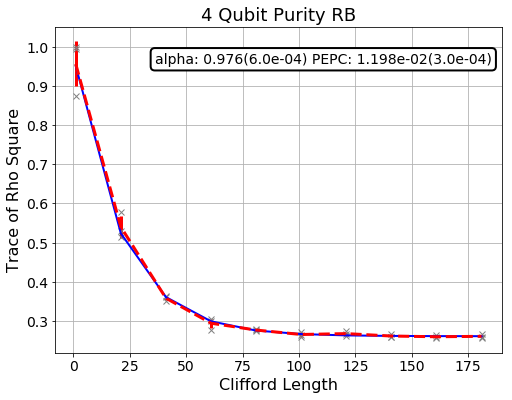

In [10]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 1, 1)

# Plot the essence by calling plot_rb_data
rbfit_purity.plot_rb_data(0, ax=ax, add_label=True, show_plt=False)
    
# Add title and label
ax.set_title('%d Qubit Purity RB'%(nQ), fontsize=18)

plt.show()

## Standard RB results

For comparison, we also print the standard RB fit results

In [11]:
standard_result_list = []
count = 0
for rb_seed in range(len(rb_purity_circs)):
    for d in range(npurity):
        if d==0:
            standard_result_list.append(purity_result_list[count])
        count += 1

In [12]:
rbfit_standard = rb.RBFitter(standard_result_list, xdata, rb_opts['rb_pattern'])

In [13]:
print (rbfit_standard.fit)

[{'params': array([0.76785217, 0.97715592, 0.22159869]), 'params_err': array([0.02301556, 0.00116043, 0.00806635]), 'epc': 0.017133056736269747, 'epc_err': 2.034649918332208e-05}, {'params': array([0.74033657, 0.97572386, 0.23550468]), 'params_err': array([0.01773793, 0.00085935, 0.00906597]), 'epc': 0.01820710487276403, 'epc_err': 1.6035581988465095e-05}]


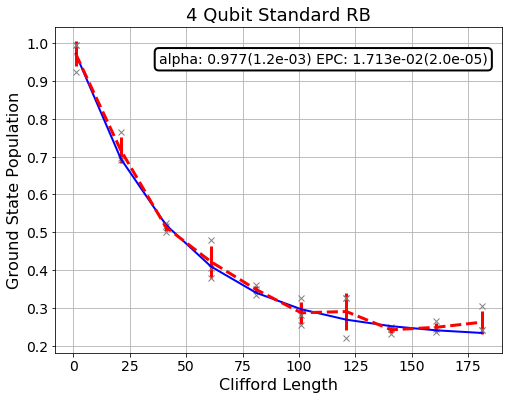

In [14]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 1, 1)

# Plot the essence by calling plot_rb_data
rbfit_standard.plot_rb_data(0, ax=ax, add_label=True, show_plt=False)
    
# Add title and label
ax.set_title('%d Qubit Standard RB'%(nQ), fontsize=18)

plt.show()

## Define a coherent noise model

We define a coherent noise model for the simulator. 

In [15]:
err_unitary = np.zeros([2, 2], dtype=complex)
angle_err = 0.1
for i in range(2):
    err_unitary[i, i] = np.cos(angle_err)
    err_unitary[i, (i+1) % 2] = np.sin(angle_err)
err_unitary[0, 1] *= -1.0

error = coherent_unitary_error(err_unitary)
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(error, 'u3')

In [16]:
#Execute purity RB circuits 
backend = qiskit.Aer.get_backend('qasm_simulator')
basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
coherent_purity_result_list = []
import time
for rb_seed in range(len(rb_purity_circs)):
    for d in range(npurity):
        print('Executing seed %d purity %d length %d'%(rb_seed, d, len(nCliffs)))
        new_circ = rb_purity_circs[rb_seed][d]
        job = qiskit.execute(new_circ, backend=backend, shots=shots, noise_model=noise_model, basis_gates=['u1','u2','u3','cx'])
        coherent_purity_result_list.append(job.result())
print("Finished Simulating Purity RB Circuits")

Executing seed 0 purity 0 length 10
Executing seed 0 purity 1 length 10
Executing seed 0 purity 2 length 10
Executing seed 0 purity 3 length 10
Executing seed 0 purity 4 length 10
Executing seed 0 purity 5 length 10
Executing seed 0 purity 6 length 10
Executing seed 0 purity 7 length 10
Executing seed 0 purity 8 length 10
Executing seed 1 purity 0 length 10
Executing seed 1 purity 1 length 10
Executing seed 1 purity 2 length 10
Executing seed 1 purity 3 length 10
Executing seed 1 purity 4 length 10
Executing seed 1 purity 5 length 10
Executing seed 1 purity 6 length 10
Executing seed 1 purity 7 length 10
Executing seed 1 purity 8 length 10
Executing seed 2 purity 0 length 10
Executing seed 2 purity 1 length 10
Executing seed 2 purity 2 length 10
Executing seed 2 purity 3 length 10
Executing seed 2 purity 4 length 10
Executing seed 2 purity 5 length 10
Executing seed 2 purity 6 length 10
Executing seed 2 purity 7 length 10
Executing seed 2 purity 8 length 10
Finished Simulating Purity R

In [17]:
rbfit_purity = rb.PurityRBFitter(coherent_purity_result_list, npurity, xdata, rb_opts['rb_pattern'])

Print the fit result (seperately for each pattern)

In [18]:
rbfit_purity.add_data(purity_result_list)
print ("raw_data:", rbfit_purity.raw_data)
print ("ydata:", rbfit_purity.ydata)
print ("fit:", rbfit_purity.fit)

raw_data: [[[1.0655555555555556, 1.0749166666666667, 1.1682944444444443, 1.2180222222222226, 0.9627833333333333, 1.0080333333333331, 1.088161111111111, 1.048488888888889, 1.0607444444444445, 1.036822222222222], [0.9340999999999999, 1.0624777777777776, 1.036411111111111, 1.1236722222222222, 1.066288888888889, 1.1264944444444442, 1.0165055555555553, 0.9410166666666666, 1.0396277777777776, 1.1802500000000002], [1.0360222222222224, 1.0107055555555555, 0.9001166666666666, 1.0086611111111112, 1.0277666666666667, 0.9001666666666668, 1.0140722222222223, 1.0117388888888892, 0.9257222222222223, 0.9166611111111111]], [[1.0682166666666668, 1.0606888888888888, 1.218522222222222, 1.0146555555555559, 1.0952222222222225, 0.886611111111111, 0.9961388888888888, 0.9677833333333334, 0.9653333333333334, 0.9333277777777778], [1.0948444444444445, 1.1536388888888889, 1.064822222222222, 0.9800777777777778, 1.0046388888888889, 1.0028833333333336, 1.1594944444444444, 1.1088888888888886, 0.9797666666666667, 1.069

## Plot the results and the fit

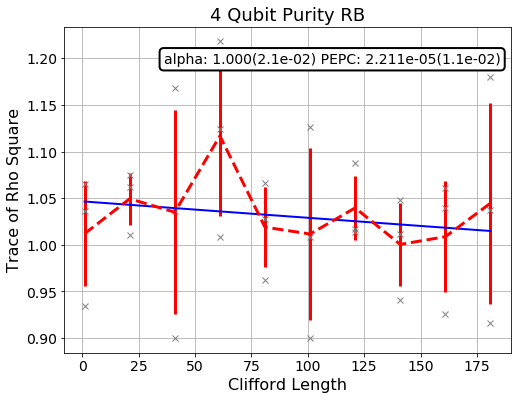

In [19]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 1, 1)

# Plot the essence by calling plot_rb_data
rbfit_purity.plot_rb_data(0, ax=ax, add_label=True, show_plt=False)
    
# Add title and label
ax.set_title('%d Qubit Purity RB'%(nQ), fontsize=18)

plt.show()

## Standard RB results

For comparison, we also print the standard RB fit results

In [24]:
standard_result_list = []
count = 0
for rb_seed in range(len(rb_purity_circs)):
    for d in range(npurity):
        if d==0:
            standard_result_list.append(coherent_purity_result_list[count])
        count += 1

In [25]:
rbfit_standard = rb.RBFitter(standard_result_list, xdata, rb_opts['rb_pattern'])

In [26]:
print (rbfit_standard.fit)

[{'params': array([0.67129832, 0.98063026, 0.32867399]), 'params_err': array([0.12868849, 0.00849528, 0.13116744]), 'epc': 0.01452730681456485, 'epc_err': 0.00012585123273932297}, {'params': array([ 1.28163629,  0.99468353, -0.27443188]), 'params_err': array([0.63958501, 0.00352791, 0.64792874]), 'epc': 0.003987349440528504, 'epc_err': 1.4142207475960816e-05}]


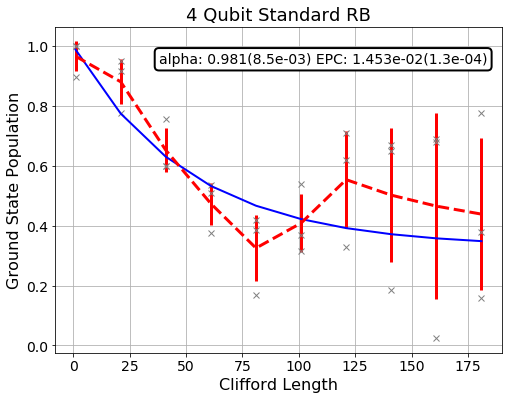

In [27]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 1, 1)

# Plot the essence by calling plot_rb_data
rbfit_standard.plot_rb_data(0, ax=ax, add_label=True, show_plt=False)
    
# Add title and label
ax.set_title('%d Qubit Standard RB'%(nQ), fontsize=18)

plt.show()